['GrintonDH', 'flashmt', 'I_love_tigersugar']


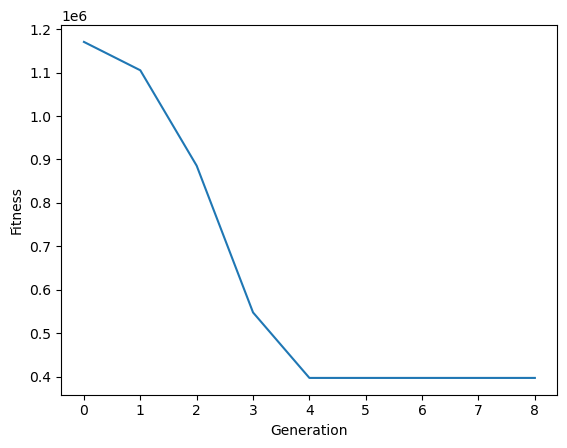

In [1]:
## import numpy as np
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog(start):
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []
Z = 0.3

## so skill chuyen vao
m_skill = 37
list_totalscore = []
with open(r"CodeForceDataset.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        cost = 0
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill

   
start = time()
atexit.register(endlog)
log("")

del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]
for i in range(0,len(population_temp)-300):
    population_temp.pop()
 

totalscore = sum(list_totalscore)

C = (h_member*3)/len(population_temp)    

class Individual(object):
    def __init__(self, candi,list_score): 
        self.candi = candi 
        self.list_score = list_score
        self.fitness = self.cal_fitness()
        self.cost = self.calCost()
        
    def cal_fitness(self):
        fitness = 0
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            fitness = fitness + (self.list_score[j-1]-team_score)**2
        fitness = math.sqrt(fitness)
        return fitness
    
    def calCost(self):
        sum_gp1 = 0
        for gp1 in self.candi:
            sum_gp1 += sum(gp1[1:m+1])
        return sum_gp1/totalscore
    
    def mate(self,partner,list_score):
        child = []
        for gp1, gp2 in zip(self.candi,partner.candi):
            sum_gp1 = sum(gp1[1:m+1])
            sum_gp2 = sum(gp2[1:m+1])
            bett = gp1 if sum_gp1 > sum_gp2 else gp2
            wors = gp2 if sum_gp1 > sum_gp2 else gp1
            prob = random.random()
            if prob < 0.60:
                if bett in child:
                    pass
                else:
                    child.append(bett)
            elif prob < 0.90:
                if wors in child:
                    pass
                else:
                    child.append(wors)
            else:
                tem = random.choice(population_temp[::])
                if tem in child:
                    pass
                else:
                    child.append(tem)
        while len(child) < 3:
            j = random.choice(population_temp[::])
            if j in child:
                pass
            else:
                child.append(j)
        return Individual(child,list_score)
    
    def check_minimumscore(self,list_score,m_skill):
        for j in range(1,m_skill+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if Z*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    def check_cost(self):
        if self.cost < C:
            return 1
        else:
            return 0

def GAs(m_skill):
    start = time()
    global population_size
    global generation_size
    global m
    list_fitness = []
    global h_member
    population = []
    candi = []

    list_score = []
    score = []
    for j in range(1,m+1):
        for i in range(0,len(population_temp)-1):
            score.append(population_temp[i][j])
        top3 = sorted(zip(score), reverse=True)[:h_member]
        summ = 0
        for i in top3:
            summ = summ + i[0]
        list_score.append(summ)
        score = []
    
    for _ in range(0,population_size):
        for _ in range(h_member):
            while len(candi) < 3:
                j = random.choice(population_temp[::])
                if j in candi:
                    pass
                else:
                    candi.append(j)
        copy = candi.copy()
        population.append(Individual(copy,list_score))
        del candi[::]
        
    loop_check = False
    generation = 1

   
    while True:
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        
        new_generation = []
        s = int((10*population_size)/100)
        new_generation.extend(population[:s])
        
        s = int((90*population_size)/100)
        for _ in range(s):
            parent1 = random.choice(population[:round(population_size*0.5)])
            parent2 = random.choice(population[:round(population_size*0.5)])
            child = parent1.mate(parent2,list_score)
            new_generation.append(child) 
  
        population = new_generation
        for p in population:
            if (p.check_minimumscore(list_score,m_skill) !=1):
                population.remove(p)
                
      
        list_fitness.append(round(population[0].fitness))
        
        if generation_size - generation < 0:
            fit_check = list_fitness[generation-1]
            j = 1
            for i in range(1,generation_size+1):
                if list_fitness[generation-i-1] == fit_check:
                    j = j + 1
            if j == 5:
                loop_check = True
        if loop_check == True:
            break
        generation += 1
    list_mem_choose = []
    for i in range(h_member):
        list_mem_choose.append(population[0].candi[i][0])
#         print(population[0].candi[i][0:m_skill+1],"\n")
    print(list_mem_choose)
    return list_fitness,endlog(start)

def main():
    
    list_fitness,end = GAs(i)
    plt.plot(list_fitness)
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.show()
    
#     list_fitness,end = GAs(37)
#     plt.plot(list_fitness)
#     plt.ylabel('Fitness')
#     plt.show()
#     print("Excution time: {0}s\n\n".format(end))

if __name__ == '__main__':
    main()

[[0, 5], [6, 456], [330]]
0.7292221813550882


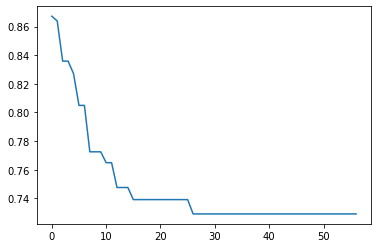

In [5]:
import csv
import random
import math
import sys
import matplotlib.pyplot as plt
import numpy as np
import math

NEEDED_SKILL = [("Group 1", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
                ("Group 2", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1),
                ("Group 3", 0,0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1)]
GROUP = [("Group 1", 2),
         ("Group 2", 2),
         ("Group 3", 1)]   
Requirement = [[ 10000, 15000, 5000, 1000, 2000, 1000, 1000, 1000, 500, 700, 200, 200, 800, 0, 200, 300, 100,200, 100, 200, 100, 0, 100, 0, 200, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50],
                [ 5000, 10000, 5000, 1000, 1000, 2000, 1000, 1000, 1000, 500, 2000, 2000, 0, 100, 0, 0, 500, 500, 100, 200, 200, 200, 0, 100, 300, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0,50],
                [ 0,0, 0, 0, 1000, 1000, 100, 500, 1000, 1000, 0, 1000, 0, 0, 0, 200, 500, 500, 100, 100, 1, 1, 0, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50]]
# Requirement = np.zeros((3,37))
# Requirement[1][36]=100
TOTAL_GROUP = 3
TOTAL_CANDIDATE =500
TOTAL_SKILL = 37     






list_fitness =[]
population_temp = []


## so skill chuyen vao
m_skill = 37
list_totalscore = []
with open(r"CodeForceDataset.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        cost = 0
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill

   

Requirement=np.array(Requirement)
Requirement=Requirement.astype(np.float64)
del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]
    del population_temp[i][0]
    
# for i in range(0,len(population_temp)-300):
#     population_temp.pop()
candidate_skill = np.array(population_temp)
candidate_skill = candidate_skill.astype(np.float64)
Reverse_data = np.array(population_temp)
Reverse_data = Reverse_data.transpose()
les = np.sort(Reverse_data, axis=1)
res = -np.sort(-Reverse_data, axis=1)

group_need = np.array(GROUP)
group_need = np.delete(group_need, 0, 1)
group_need = group_need.transpose()
group_need = group_need.astype(np.int32)

needed_skill = np.array(NEEDED_SKILL)
needed_skill = np.delete(needed_skill, 0, 1)
needed_skill = needed_skill.astype(np.float64)


Weight = [0.15,0.15,0.15]
weight1=[0.15,0.15,0.15]
max_point_deep = {}
min_point_deep = {}


##Calculate Max
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += needed_skill[g, s]*res[s][i]
                b += needed_skill[g, s]*les[s][i]
               
        max_point_deep[g] = a
        min_point_deep[g] = b

max_point_wise = {}
min_point_wise = {}

##Calculate Min
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += min(1,res[s][i])
                b += min(1, needed_skill[g][s]*les[s][i])
                
        max_point_wise[g] = a
        min_point_wise[g] = b

def crossover(parent_1,parent_2):
    a=[]
    child=[]
    for i in range(0,TOTAL_GROUP):
        for j in range(0,group_need[0][i]):
            a.append(parent_1.candi[i][j])
            a.append(parent_2.candi[i][j])
    b=[]
   
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(a)-1)
            choose.append(a[selection])
            a.pop(selection)
        b.append(choose)
    return solution(b)

        
        
        
    
##Individuals
class solution :
    def __init__(self, candi): 
        self.candi = candi 
        if self.check_contraint1()==True :
         self.fitness = self.cal_fitness()
        else:
         self.fitness=1
        1
      
    ##Fitness    
    def cal_fitness(self):
        fitness = 0
        deep = {}
        wise = {}
        for j in range(0, TOTAL_GROUP):
            deep_obj = 0
            wise_obj = 0
            for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
                    wise_obj += min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
            deep[j] = deep_obj
            wise[j] = wise_obj
                
        for g in range(0,TOTAL_GROUP):
            
            fitness+= Weight[g]*((deep[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
       
        fit = 0
        for g in range(0,TOTAL_GROUP):
            fit+=  weight1[g]*((wise[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
        
        fitness+= fit
        fitness=math.sqrt(fitness)
        return fitness

    
    def cal_group_deep_fitness(self,j):
        fitness = 0
        
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
        fitness = Weight[j]*((deep_obj-max_point_deep[j])/(max_point_deep[j]-min_point_deep[j]))**2
        return fitness             
    def cal_group_wise_fitness(self,j):
        fitness = 0
        
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
                    
        fitness = Weight[j]*((wise_obj-max_point_wise[j])/(max_point_wise[j]-min_point_wise[j]))**2
        return fitness      
    def cal_deep_objective(self,j):
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]       
        return deep_obj
    def cal_wise_objective(self,j):
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
        return wise_obj

    ##Mutation
    def mutation(self,n):
      
        self.candi = generateRandomSolution().candi
        if self.check_contraint1() == True:
         self.fitness=self.cal_fitness()
        else:
         self.fitness=1
    def check_contraint1(self):
        a=[]
        for i in range(0,TOTAL_GROUP):
            for k in range(0,group_need[0][i]):
                a.append(self.candi[i][k])
        set_a = set(a)
        if len(a)!=len(set_a) : return False
        return True
 
def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a


def fitness(obj):
    
    return obj.fitness


def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a


def fitness(obj):
    
    return obj.fitness
def GAs():
    raw_population=[]
    GA_solution_collection=[]
    objective=[]
    
    ## first Gen
    raw_population = generateFirstGeneration(math.floor(1000))
    population_fitness = []
    vio=[]
    violant=0
    for i in range (0,len(raw_population)):
       
        s = raw_population[i]
        if s.fitness==1:
            violant+=1
        population_fitness.append(s.fitness)
    vio.append(violant)
    k= next(x for x in raw_population if x.fitness == min(population_fitness) )
    min_solu=k.candi
    GA_solution_collection.append(k.candi)
    objective.append(min(population_fitness))
    loop_check = True
    min_generation = min(objective)
    Number_of_min_gen=0

    
    while loop_check==True:
        population =[]
        population_fitness = []    
        sorted_fitness=[]   
        ##Selection

        
        sorted_fitness = sorted(raw_population,key=lambda x: x.fitness)
        for i in range(0,100):
            population.append(sorted_fitness[i])

        ##Crossover
        for i in range(0,900):
            select1 = random.randint(0,999)
            select2 = random.randint(0,999)

            a=[]
         
            a=crossover(sorted_fitness[select1],sorted_fitness[select2])
            population.append(a)

            
            
        ##Mutation
        for i in range(0,100):
            select = random.randint(50,999)
            population[select].mutation(1)
        raw_population=np.array(population,copy=True)
        for i in range(0,len(population)):
            if population[i].fitness ==1:
                population.pop(i)
                population.append(generateRandomSolution())
        violanyt=0
        for i in range(0,len(population)):
            if(population[i].fitness==1):
                violanyt+=1
            population_fitness.append(population[i].fitness)
  
        k= next(x for x in population if x.fitness == min(population_fitness))
        vio.append(violanyt)
        objective.append(k.fitness)
        min_ft = solution(min_solu)
        if k.fitness<min_ft.fitness:
            min_solu=k.candi
        GA_solution_collection.append(min_solu)
        
        
        
       
        
           
           
           
           
        if min(objective)<min_generation:
            min_generation=min(objective)
            Number_of_min_gen=0
        else:
            Number_of_min_gen= Number_of_min_gen + 1
        if Number_of_min_gen==30:
            loop_check=False
        
        
    k= next(x for x in population if x.fitness == min(objective))
    print(k.candi)
    print(min(objective))
    plt.plot(objective)
    return GA_solution_collection
    
GA_best_solution=GAs()

{0: 3597600.8888870003, 1: 3454630.3273040005, 2: 1689677.3538329997}
[[6, 5], [456, 0], [330]]
0.7302668448189357


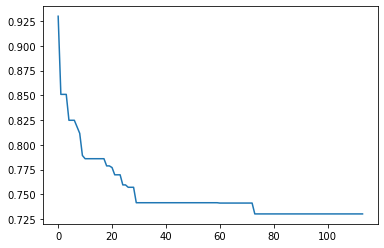

In [6]:
import csv

import random
import math
import sys
import matplotlib.pyplot as plt
import atexit


import numpy as np
import math

NEEDED_SKILL = [("Group 1", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
                ("Group 2", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1),
                ("Group 3", 0,0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1)]
GROUP = [("Group 1", 2),
         ("Group 2", 2),
         ("Group 3", 1)]   
Requirement = [[ 10000, 15000, 5000, 1000, 2000, 1000, 1000, 1000, 500, 700, 200, 200, 800, 0, 200, 300, 100,200, 100, 200, 100, 0, 100, 0, 200, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50],
                [ 5000, 10000, 5000, 1000, 1000, 2000, 1000, 1000, 1000, 500, 2000, 2000, 0, 100, 0, 0, 500, 500, 100, 200, 200, 200, 0, 100, 300, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0,50],
                [ 0,0, 0, 0, 1000, 1000, 100, 500, 1000, 1000, 0, 1000, 0, 0, 0, 200, 500, 500, 100, 100, 1, 1, 0, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50]]
TOTAL_GROUP = 3
TOTAL_CANDIDATE =500
TOTAL_SKILL = 37     


list_fitness =[]
population_temp = []


## so skill chuyen vao
m_skill = 37
list_totalscore = []
with open(r"CodeForceDataset.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        cost = 0
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                    cost += float(row)
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
        list_totalscore.append(cost)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill


Requirement=np.array(Requirement)
Requirement=Requirement.astype(np.float64)
del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]
    del population_temp[i][0]
# for i in range(0,len(population_temp)-300):
#     population_temp.pop()
candidate_skill = np.array(population_temp)
candidate_skill = candidate_skill.astype(np.float64)
Reverse_data = np.array(population_temp)
Reverse_data = Reverse_data.transpose()
les = np.sort(Reverse_data, axis=1)
res = -np.sort(-Reverse_data, axis=1)

group_need = np.array(GROUP)
group_need = np.delete(group_need, 0, 1)
group_need = group_need.transpose()
group_need = group_need.astype(np.int32)

needed_skill = np.array(NEEDED_SKILL)
needed_skill = np.delete(needed_skill, 0, 1)
needed_skill = needed_skill.astype(np.float64)


Weight = [0.15,0.15,0.15]
weight1=[0.15,0.15,0.15]
max_point_deep = {}
min_point_deep = {}


##Calculate Max
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += needed_skill[g, s]*res[s][i]
                b += needed_skill[g, s]*les[s][i]
               
        max_point_deep[g] = a
        min_point_deep[g] = b

max_point_wise = {}
min_point_wise = {}

##Calculate Min
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += min(1,res[s][i])
                b += min(1, needed_skill[g][s]*les[s][i])
                
        max_point_wise[g] = a
        min_point_wise[g] = b
print(max_point_deep)
def crossover(parent_1,parent_2):
    a=[]
    child=[]
    for i in range(0,TOTAL_GROUP):
        for j in range(0,group_need[0][i]):
            a.append(parent_1.candi[i][j])
            a.append(parent_2.candi[i][j])
    b=[]
   
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(a)-1)
            choose.append(a[selection])
            a.pop(selection)
        b.append(choose)
    return solution(b)

        
        
        
    
##Individuals
class solution :
    def __init__(self, candi): 
        self.candi = candi 
        if self.check_contraint1()==True :
         self.fitness = self.cal_fitness()
        else:
         self.fitness=1
        1
      
    ##Fitness    
    def cal_fitness(self):
        fitness = 0
        deep = {}
        wise = {}
        for j in range(0, TOTAL_GROUP):
            deep_obj = 0
            wise_obj = 0
            for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
                    wise_obj += min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
            deep[j] = deep_obj
            wise[j] = wise_obj
                
        for g in range(0,TOTAL_GROUP):
            
            fitness+= Weight[g]*((deep[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
       
        fit = 0
        for g in range(0,TOTAL_GROUP):
            fit+=  weight1[g]*((wise[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
        
        fitness+= fit
        fitness=math.sqrt(fitness)
        return fitness

    
    def cal_group_deep_fitness(self,j):
        fitness = 0
        
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
        fitness = Weight[j]*((deep_obj-max_point_deep[j])/(max_point_deep[j]-min_point_deep[j]))**2
        return fitness             
    def cal_group_wise_fitness(self,j):
        fitness = 0
        
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
                    
        fitness = Weight[j]*((wise_obj-max_point_wise[j])/(max_point_wise[j]-min_point_wise[j]))**2
        return fitness      
    def cal_deep_objective(self,j):
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]       
        return deep_obj
    def cal_wise_objective(self,j):
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
        return wise_obj
    def cal_group_fitness(self,j):
        fitness = 0
        
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
        fitness = Weight[j]*((deep_obj-max_point_deep[j])/(max_point_deep[j]-min_point_deep[j]))**2
        return fitness  
    ##Mutation
    def mutation(self,n):
      
        self.candi = generateRandomSolution().candi
        if self.check_contraint1() == True:
         self.fitness=self.cal_fitness()
        else:
         self.fitness=1
    def check_contraint1(self):
        a=[]
        for i in range(0,TOTAL_GROUP):
            for k in range(0,group_need[0][i]):
                a.append(self.candi[i][k])
        set_a = set(a)
        if len(a)!=len(set_a) : return False
        return True
 
def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a


def fitness(obj):
    
    return obj.fitness


def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a
##pheramone matrix
sum=0

for i in range(0,TOTAL_GROUP):
    sum+=group_need[0][i]
a =np.zeros((TOTAL_CANDIDATE,TOTAL_GROUP))
def cal_pheromone(candi,group):
    deep_obj = 0
    wise_obj = 0
    fitness=0
    fit=0        
                
    for k in range(0,TOTAL_SKILL):
        deep_obj += needed_skill[group][k]*candidate_skill[candi][k]
                    
        wise_obj += min(1,needed_skill[group][k]*candidate_skill[candi][k])
    fitness+= Weight[group]*((deep_obj-max_point_deep[group])/(max_point_deep[group]-min_point_deep[group]))**2
    fit+=  Weight[group]*((wise_obj-max_point_deep[group])/(max_point_deep[group]-min_point_deep[group]))**2
    return (math.sqrt(fit)+math.sqrt(fitness))/2

best_solution=generateRandomSolution()
best_solutions=[]
best_solutionss=[]
best_solutionss.append(best_solution)
best_solutions.append(best_solution.fitness)
min_fit=1
for i in range(0,TOTAL_CANDIDATE):
    for j in range(0,TOTAL_GROUP):
        a[i][j]=cal_pheromone(i,j)

class gr:
    def __init__(self, candi,group): 
        self.candi=candi
        self.group = group
        self.fitness = self.cal_fitness()
    def cal_fitness(self):
        fitness = 0
        wise_obj = 0
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[i]][k]
                    wise_obj += min(1,needed_skill[j][k]*candidate_skill[self.candi[i]][k])
        fitness = deep_obj+wise_obj
       
        return fitness
class tup:
    def __init__(self, candi): 
        self.candi=candi
    def isIn(self,num):
        a=[]
        for i in range(0,len(self.candi)):
            for j in range(0,len(self.candi[i])):
                    a.append(self.candi[i][j])
        return num in a

loop_check=0
min_generation=best_solution.fitness
while loop_check<40:
    population=[]
    for i in range(0,300):
        sum=a.sum(axis=0)
        solu=[]
        for j in range(0,TOTAL_GROUP):
            sum_gr=0
            # for k in range(0,TOTAL_CANDIDATE):
            #     sum_gr+=a[k][j]*1/cal_pheromone(k,j)
            p=[]
            choie=[]
            for k in range(0,TOTAL_CANDIDATE):
                prob= (a[k][j])/sum[j]
                p.append(prob)
        
            for l in range(0,group_need[0][j]):
                tan = tup(solu)
                num_1=np.random.choice(np.arange(0,TOTAL_CANDIDATE),p=p )
                while tan.isIn(num_1) or num_1 in choie:
                
                    num_1=np.random.choice(np.arange(0,TOTAL_CANDIDATE),p=p )
               
                
                choie.append(num_1)
            solu.append(choie)
        
         
        solu=solution(solu)
        population.append(solu)   
        
        if solu.fitness<best_solution.fitness:
            best_solution=solu
    if min_generation > best_solution.fitness:
        min_generation=best_solution.fitness
        loop_check=0
    else:
        loop_check+=1           
    best_solutions.append(best_solution.fitness)
    best_solutionss.append(best_solution) 
    sorted_fitness = sorted(population,key=lambda x: x.fitness)
    ##Update Pheromone
    for i in range(0,50):
        for j in range(0,TOTAL_GROUP):
                
                
                    for k in range(0,group_need[0][j]):
                        pop = sorted_fitness[i].candi
                        
                        num=pop[j][k]
                        a[num][j]+= cal_pheromone(num,j)
print(best_solutionss[len(best_solutionss)-1].candi)
print(best_solutions[len(best_solutionss)-1])
plt.plot(best_solutions)

[[236, 449], [550, 778], [76]]
0.6375489168676997


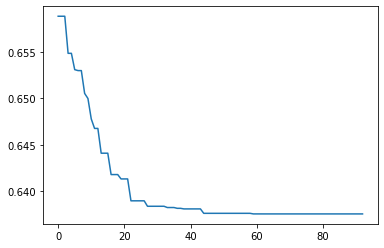

In [7]:
import csv
import random
import math
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

NEEDED_SKILL = [("Group 1", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
                ("Group 2", 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
                ("Group 3", 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1)]
GROUP = [("Group 1", 2),
         ("Group 2", 2),
         ("Group 3", 1)]   
Requirement = [( 8, 1, 10, 1, 1, 5, 5, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 10, 1, 10,1, 1, 1, 1, 1, 1, 1, 1, 1, 2),
                ( 8, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 10,1, 1, 1,1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2),
                ( 4,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,1, 1, 1, 1, 1, 5, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1)]

TOTAL_GROUP = 3
TOTAL_CANDIDATE =1000
TOTAL_SKILL = 30     
def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))




list_fitness =[]
population_temp = []


## so skill chuyen vao
m_skill = 37
list_totalscore = []
population_temp = pd.read_excel(r"RandomDataset.xlsx")

Requirement=np.array(Requirement)
Requirement=Requirement.astype(np.float64)

population_temp = np.array(population_temp)

candidate_skill = np.array(population_temp)
candidate_skill = candidate_skill.astype(np.float64)
Reverse_data = np.array(population_temp)
Reverse_data = Reverse_data.transpose()
les = np.sort(Reverse_data, axis=1)
res = -np.sort(-Reverse_data, axis=1)

group_need = np.array(GROUP)
group_need = np.delete(group_need, 0, 1)
group_need = group_need.transpose()
group_need = group_need.astype(np.int32)

needed_skill = np.array(NEEDED_SKILL)
needed_skill = np.delete(needed_skill, 0, 1)
needed_skill = needed_skill.astype(np.float64)


Weight = [0.15,0.15,0.15]
Weight1 = [0.15,0.15,0.15]
max_point_deep = {}
min_point_deep = {}

for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += needed_skill[g, s]*res[s][i]
                b += needed_skill[g, s]*les[s][i]
               
        max_point_deep[g] = a
        min_point_deep[g] = b

max_point_wise = {}
min_point_wise = {}
for g in range(0, TOTAL_GROUP):
        a = 0
        b = 0
        for s in range(0, TOTAL_SKILL):
            for i in range(0, group_need[0][g]):
                a += min(1,needed_skill[g][s]*res[s][i])
                b += min(1,needed_skill[g][s]* les[s][i])
                
        max_point_wise[g] = a
        min_point_wise[g] = b

def crossover(parent_1,parent_2):
    a=[]
    child=[]
    for i in range(0,TOTAL_GROUP):
        for j in range(0,group_need[0][i]):
            a.append(parent_1.candi[i][j])
            a.append(parent_2.candi[i][j])
    b=[]
   
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(a)-1)
            choose.append(a[selection])
            a.pop(selection)
        b.append(choose)
    return solution(b)

        
        
        
    

class solution :
    def __init__(self, candi): 
        self.candi = candi 
        if self.check_contraint1()==True:
         self.fitness = self.cal_fitness()
        else:
         self.fitness=1
       
      
        
    def cal_fitness(self):
        fitness = 0
        deep = {}
        wise = {}
        for j in range(0, TOTAL_GROUP):
            deep_obj = 0
            wise_obj = 0
            for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
                    wise_obj += min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
            deep[j] = deep_obj
            wise[j] = wise_obj
                
        for g in range(0,TOTAL_GROUP):
            
            fitness+= Weight[g]*((deep[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
       
        fit = 0
        for g in range(0,TOTAL_GROUP):
            fit+=  weight1[g]*((wise[g]-max_point_deep[g])/(max_point_deep[g]-min_point_deep[g]))**2
        
        fitness+= fit
        fitness=math.sqrt(fitness)
        return fitness

    
    def cal_group_deep_fitness(self,j):
        fitness = 0
        
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
        fitness = Weight[j]*((deep_obj-max_point_deep[j])/(max_point_deep[j]-min_point_deep[j]))**2
        return fitness             
    def cal_group_wise_fitness(self,j):
        fitness = 0
        
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
                    
        fitness = Weight[j]*((wise_obj-max_point_wise[j])/(max_point_wise[j]-min_point_wise[j]))**2
        return fitness      
    def cal_deep_objective(self,j):
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]       
        return deep_obj
    def cal_wise_objective(self,j):
        wise_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    wise_obj+=min(1,needed_skill[j][k]*candidate_skill[self.candi[j][i]][k])
        return wise_obj
    def cal_group_fitness(self,j):
        fitness = 0
        
        deep_obj = 0
        for i in range(0,group_need[0][j]):
                
                for k in range(0,TOTAL_SKILL):
                    deep_obj += needed_skill[j][k]*candidate_skill[self.candi[j][i]][k]
                    
        fitness = Weight[j]*((deep_obj-max_point_deep[j])/(max_point_deep[j]-min_point_deep[j]))**2
        return fitness
    def mutation(self,n):
        # solu = self.candi
        # for i in range(0,n):
        #     selection_1 = random.randint(0, TOTAL_CANDIDATE-1)
        #     selection_2 = random.randint(0,TOTAL_GROUP-1)
        #     selection_3 = random.randint(0,group_need[0][selection_2]-1)
        #     solu[selection_2][selection_3]=selection_1
        
        # self.candi = solu
        self.candi = generateRandomSolution().candi
        if self.check_contraint1() == True:
         self.fitness=self.cal_fitness()
        else:
         self.fitness=1
    def check_contraint1(self):
        a=[]
        for i in range(0,TOTAL_GROUP):
            for k in range(0,group_need[0][i]):
                a.append(self.candi[i][k])
        set_a = set(a)
        if len(a)!=len(set_a) : return False
        return True
    def valueonskill(self,s,g):
        v=0
        for i in range(0,group_need[0][g]):
            v+=candidate_skill[self.candi[g][i]][s]
        return v
    def check_contraint2(self):
        for i in range(0,TOTAL_GROUP):
            for s in range(0,TOTAL_SKILL):
                if self.valueonskill(s,i)<Requirement[i][s]:
                    return False
        return True
def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a




def generateRandomSolution():
    a=[]
    ran =[]
    for i in range(0,TOTAL_CANDIDATE):
        ran.append(i)
    ran.append(TOTAL_CANDIDATE)
    for i in range(0,TOTAL_GROUP):
        choose = []
        
        for j in range(0,group_need[0][i]):
            selection = random.randint(0, len(ran)-2)
            choose.append(selection)
            ran.pop(selection)
        a.append(choose)
    return solution(a)

def generateFirstGeneration(quantity):
    a=[]
    for i in range(0,quantity):
        a.append(generateRandomSolution())
    return a


def fitness(obj):
    
    return obj.fitness
def GAs():
    raw_population=[]
    GA_solution_collection=[]
    objective=[]
    
    
    raw_population = generateFirstGeneration(math.floor(2000))
    population_fitness = []
    vio=[]
    violant=0
    for i in range (0,len(raw_population)):
       
        s = raw_population[i]
        if s.fitness==1:
            violant+=1
        population_fitness.append(s.fitness)
    vio.append(violant)
    k= next(x for x in raw_population if x.fitness == min(population_fitness) )
    min_solu=k.candi
    GA_solution_collection.append(k.candi)
    objective.append(min(population_fitness))
    loop_check = True
    min_generation = min(objective)
    Number_of_min_gen=0
    while loop_check==True:
        population =[]
        population_fitness = []    
        sorted_fitness=[]   
        ##Selection

        
        sorted_fitness = sorted(raw_population,key=lambda x: x.fitness)
        for i in range(0,200):
            population.append(sorted_fitness[i])

        ##Crossover
        for i in range(0,1800):
            select1 = random.randint(0,1999)
            select2 = random.randint(0,1999)

            a=[]
         
            a=crossover(sorted_fitness[select1],sorted_fitness[select2])
            population.append(a)

            
            
        ##Mutation
        for i in range(0,200):
            select = random.randint(100,1999)
            population[select].mutation(1)
        raw_population=np.array(population,copy=True)
        for i in range(0,len(population)):
            if population[i].fitness ==1:
                population.pop(i)
                population.append(generateRandomSolution())
        violanyt=0
        for i in range(0,len(population)):
            if(population[i].fitness==1):
                violanyt+=1
            population_fitness.append(population[i].fitness)
  
        k= next(x for x in population if x.fitness == min(population_fitness))
        vio.append(violanyt)
        objective.append(k.fitness)
        min_ft = solution(min_solu)
        if k.fitness<min_ft.fitness:
            min_solu=k.candi
        GA_solution_collection.append(min_solu)
        
        
        
       
        
           
           
           
           
        if min(objective)<min_generation:
            min_generation=min(objective)
            Number_of_min_gen=0
        else:
            Number_of_min_gen= Number_of_min_gen + 1
        if Number_of_min_gen==30:
            loop_check=False
        
        
    k= next(x for x in population if x.fitness == min(objective))
    print(k.candi)
    print(min(objective))
    plt.plot(objective)
    return GA_solution_collection
    
GA_best_solution=GAs()